## Import Libraries & Explore Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import re

In [2]:
orders_file = "datasets/orders_v1.csv"
customers_file = "datasets/customers_v1.csv"
products_file = "datasets/products_v1.csv"
categories_file = "datasets/categories_v1.csv"

In [3]:
orders = pd.read_csv(orders_file)
customers = pd.read_csv(customers_file)
products = pd.read_csv(products_file)
categories = pd.read_csv(categories_file)

In [4]:
orders.head(10)

,order_id,product_id,customer_id,quantity,price,order_date,order_time,delivery_to,delivery_status,discount_percent,shipping_method,coupon_code,is_gift
0,1,10104,13321,2,126.49,1/1/2019,11:26 AM,"Greenville, PA 78100",Delivered,0,Standard,NaN,False
1,2,10077,6170,4,40.58,1/1/2019,20:59,WA,Delivered,0,Same-Day,NaN,False
2,3,10106,22673,3,110.32,1/1/2019,12:35:28,CA 00000,Shipped,0,Standard,NaN,False
3,4,10035,22168,1,NaN,1/1/2019,18:06:15,"Georgetown, TX 78936",Delivered,0,Standard,NaN,False
4,5,10046,21294,2,80.25,1/1/2019,7:37 PM,NY,Delivered,0,Standard,NaN,False
5,6,10202,23344,1,15.38,1/1/2019,9:43:39,NY,Delivered,0,Standard,NaN,False
6,7,10158,10561,1,49.29,1/1/2019,21:35:22,GA,Delivered,20,Standard,WELCOME5,False
7,8,10054,14621,1,331.65,1/1/2019,16:17:20,TX 00000,Delivered,0,Express,NaN,False
8,9,10002,10388,1,1142.09,1/1/2019,11:16:02,"Bristol, TX 95338",Delivered,0,Standard,NaN,False
9,10,10189,9292,1,NaN,1/1/2019,9:37 PM,TX,Delivered,0,Standard,NaN,False


In [5]:
customers.head(10)

,customer_id,name,email,birth_year,birthday_month,gender,address,state,member_since,membership_tier
0,1,Tabert Fieldez,customer1@example.com,2001,11,Female,NC,NC,2017-06-12,Bronze
1,2,Nafal P. Senov,customer2@example.com,1991,11,Female,CA,CA,2021-08-25,Silver
2,3,Malen Sonwell,customer3@example.com,1989,3,Female,NY,NY,2020-01-05,Bronze
3,4,Dasen Monshi,customer4@example.com,1985,6,Male,CA,CA,2022-04-15,Silver
4,5,Xefield Leyham,customer5@example.com,1993,7,Male,WA,WA,2021-10-08,Silver
5,6,Vaton Moreshi,customer6@example.com,1988,2,Female,WA,WA,2018-02-05,Bronze
6,7,Gaman T. Fordkar,customer7@example.com,1983,6,Female,CA,CA,2019-09-13,Bronze
7,8,Kason F. Stoneshi,customer8@example.com,1984,1,Female,NY,NY,2023-10-25,Bronze
8,9,Haton Q. Kinsic,customer9@example.com,1996,6,Female,CA,CA,2020-06-13,Bronze
9,10,Hafield Dorian,customer10@example.com,1987,5,Other,NY,NY,2020-11-15,Silver


In [6]:
products.head(10)

,product_id,product_name,category_id,unit_price
0,10001,Smartphone Basic,1,1207.480
1,10002,Laptop Plus,1,1253.272
2,10003,Wireless Earbuds Pro,1,1714.296
3,10004,Bluetooth Speaker Mini,1,1580.296
4,10005,Smartwatch Max,1,1618.144
5,10006,Gaming Console Value Pack,1,1484.808
6,10007,4K TV Bundle,1,959.264
7,10008,Tablet Eco,1,1168.752
8,10009,Wi‑Fi Router Premium,1,1203.880
9,10010,Noise‑Cancel Headphones Sport,1,824.576


In [7]:
categories.head(10)

,category_id,category_name
0,1,Electronics
1,2,Home Improvement
2,3,Pet Supplies
3,4,Health & Wellness
4,5,Clothing
5,6,Toys & Games
6,7,Footwear
7,8,Household
8,9,Personal Care
9,10,Stationery


## Data Inspection

In [8]:
def summarize(df, name):
    print(f"\n===== {name} =====")
    print(df.info())
    print(df.describe(include="all"))
    print("\nMissing Vales: \n", df.isna().sum())
    print("\nDuplicates:", df.duplicated().sum())

summarize(orders, "ORDERS RAW")
summarize(customers, "CUSTOMERS RAW")
summarize(products, "PRODUCTS RAW")
summarize(categories, "CATEGORIES RAW")


===== ORDERS RAW =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213561 entries, 0 to 213560
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          213561 non-null  int64  
 1   product_id        213561 non-null  int64  
 2   customer_id       213561 non-null  int64  
 3   quantity          213561 non-null  int64  
 4   price             202313 non-null  float64
 5   order_date        213561 non-null  object 
 6   order_time        213561 non-null  object 
 7   delivery_to       213561 non-null  object 
 8   delivery_status   213561 non-null  object 
 9   discount_percent  213561 non-null  int64  
 10  shipping_method   213561 non-null  object 
 11  coupon_code       64058 non-null   object 
 12  is_gift           213561 non-null  bool   
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 19.8+ MB
None
             order_id     product_id    customer_id       quantity  

## Data Cleaning & Manipulation

### 1. Standardize and Format Data

In [9]:
def clean_date(value):
    try:
        return pd.to_datetime(value, errors="coerce")
    except Exception:
        return pd.NaT

In [10]:
long_address = orders["delivery_to"].dropna().astype(str).str.strip()
long_address = long_address[long_address.str.len()>2].unique()
print("Sample delivery_to values (len)>2")
for addr in long_address[:20]:
    print(addr)

Sample delivery_to values (len)>2
Greenville, PA 78100
CA 00000
Georgetown, TX 78936
TX 00000
Bristol, TX 95338
NC 00000
WA 00000
Franklin, NJ 98546
NJ 00000
FL 00000
PA 00000
NY 00000
GA 00000
Greenville, NC 83978
Ashland, CA 62547
Bristol, NC 54086
Riverview, IL 63391
Greenville, FL 40352
Georgetown, TX 85038
IL 00000


In [11]:
US_STATE_ABBREV = {
    "AL","AK","AZ","AR","CA","CO","CT","DE","FL","GA",
    "HI","ID","IL","IN","IA","KS","KY","LA","ME","MD",
    "MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ",
    "NM","NY","NC","ND","OH","OK","OR","PA","RI","SC",
    "SD","TN","TX","UT","VT","VA","WA","WV","WI","WY"
}

In [12]:
def clean_state(value):
    if pd.isna(value):
        return np.nan

    s = str(value).strip()

    if len(s) == 2 and s.upper() in US_STATE_ABBREV:
        return s.upper()

    tokens = re.findall(r"\b[A-Za-z]{2}\b", s.upper())

    if tokens:
        for token in reversed(tokens):
            if token in US_STATE_ABBREV:
                return token
    
    return np.nan

In [13]:
def clean_time(value):
    if pd.isna(value):
        return np.nan

    s = str(value).strip().upper()

    # Match patterns like 15:54:17 | 20:33 | 9:57 AM | 4:29 PM | 9:01
    pattern = r"""
        ^\s*
        (?P<hour>\d{1,2})
        :
        (?P<minute>\d{2})
        (?: : (?P<second>\d{2}) )?
        \s*
        (?P<ampm>AM|PM)?
        \s*$
    """
    match = re.match(pattern, s, re.VERBOSE)
    
    if not match:
        return np.nan

    hour = int(match.group("hour"))
    minute = int(match.group("minute"))
    second = int(match.group("second")) if match.group("second") else 0
    ampm = match.group("ampm")

    if ampm == "PM" and hour != 12:
        hour += 12
    elif ampm == "AM" and hour == 12:
        hour = 0

    if hour > 23 or minute > 59 or second > 59:
        return np.nan

    return f"{hour:02d}:{minute:02d}:{second:02d}"

In [14]:
def clean_customer_name(name):
    if pd.isna(name):
        return np.nan

    name = str(name).strip().title()
    return name

In [15]:
def clean_email(email):
    if pd.isna(email): return np.nan
    email = email.strip().lower()
    return email if "@" in email else np.nan

In [16]:
def clean_gender(g):
    if pd.isna(g): return np.nan
    g = str(g).strip().lower()

    if g in ["male", "m"]: return "Male"
    if g in ["female", "f"]: return "Female"
    return "Other"

In [17]:
# Clean Orders
orders_clean = orders.copy()

orders_clean["order_date"] = orders_clean["order_date"].apply(clean_date).dt.normalize()
orders_clean["order_time"] = orders_clean["order_time"].apply(clean_time)
orders_clean["order_time"] = pd.to_datetime(orders_clean["order_time"],format="%H:%M:%S",errors="coerce").dt.time

orders_clean["delivery_to"] = orders_clean["delivery_to"].apply(clean_state)

orders_clean["price"] = pd.to_numeric(orders_clean["price"], errors = "coerce")
orders_clean["quantity"] = pd.to_numeric(orders_clean["quantity"], errors = "coerce")

orders_clean["revenue"] = orders_clean["price"] * orders_clean["quantity"]
orders_clean["year"] = orders_clean["order_date"].dt.year.astype("Int64")
orders_clean["month"] = orders_clean["order_date"].dt.month.astype("Int64")
orders_clean["day"] = orders_clean["order_date"].dt.day.astype("Int64")

orders_clean["discount_percent"] = orders_clean["discount_percent"].fillna(0)

orders_clean.head()

C:\Users\Qcells\AppData\Local\Temp\ipykernel_4416\429107267.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  return pd.to_datetime(value, errors="coerce")


,order_id,product_id,customer_id,quantity,price,order_date,order_time,delivery_to,delivery_status,discount_percent,shipping_method,coupon_code,is_gift,revenue,year,month,day
0,1,10104,13321,2,126.49,2019-01-01,11:26:00,PA,Delivered,0,Standard,NaN,False,252.98,2019,1,1
1,2,10077,6170,4,40.58,2019-01-01,20:59:00,WA,Delivered,0,Same-Day,NaN,False,162.32,2019,1,1
2,3,10106,22673,3,110.32,2019-01-01,12:35:28,CA,Shipped,0,Standard,NaN,False,330.96,2019,1,1
3,4,10035,22168,1,NaN,2019-01-01,18:06:15,TX,Delivered,0,Standard,NaN,False,NaN,2019,1,1
4,5,10046,21294,2,80.25,2019-01-01,19:37:00,NY,Delivered,0,Standard,NaN,False,160.50,2019,1,1


In [18]:
# Clean Customers
customers_clean = customers.copy()

customers_clean["name"] = customers_clean["name"].apply(clean_customer_name)
customers_clean["state"] = customers_clean["state"].apply(clean_state)
customers_clean["email"] = customers_clean["email"].apply(clean_email)
customers_clean["gender"] = customers_clean["gender"].apply(clean_gender)
customers_clean["membership_tier"] = customers_clean["membership_tier"].str.strip().str.title()

customers_clean.head()

,customer_id,name,email,birth_year,birthday_month,gender,address,state,member_since,membership_tier
0,1,Tabert Fieldez,customer1@example.com,2001,11,Female,NC,NC,2017-06-12,Bronze
1,2,Nafal P. Senov,customer2@example.com,1991,11,Female,CA,CA,2021-08-25,Silver
2,3,Malen Sonwell,customer3@example.com,1989,3,Female,NY,NY,2020-01-05,Bronze
3,4,Dasen Monshi,customer4@example.com,1985,6,Male,CA,CA,2022-04-15,Silver
4,5,Xefield Leyham,customer5@example.com,1993,7,Male,WA,WA,2021-10-08,Silver


In [19]:
# Clean Products
products_clean = products.copy()

products_clean["product_name"] = products_clean["product_name"].str.strip().str.title()

products_clean.head()

,product_id,product_name,category_id,unit_price
0,10001,Smartphone Basic,1,1207.480
1,10002,Laptop Plus,1,1253.272
2,10003,Wireless Earbuds Pro,1,1714.296
3,10004,Bluetooth Speaker Mini,1,1580.296
4,10005,Smartwatch Max,1,1618.144


In [20]:
# Clean Category
categories_clean = categories.copy()

categories_clean["category_name"] = categories_clean["category_name"].str.strip().str.title()

categories_clean.head()

,category_id,category_name
0,1,Electronics
1,2,Home Improvement
2,3,Pet Supplies
3,4,Health & Wellness
4,5,Clothing


### 2. Remove Duplicates

In [21]:
orders_clean[orders_clean.duplicated(subset=["order_id"], keep=False)].head()

,order_id,product_id,customer_id,quantity,price,order_date,order_time,delivery_to,delivery_status,discount_percent,shipping_method,coupon_code,is_gift,revenue,year,month,day
509,510,10046,17434,1,80.25,2019-01-06,15:04:44,FL,Delivered,15,Express,VIP15,False,80.25,2019,1,6
1178,1179,10078,16780,1,6.96,2019-01-14,18:01:00,FL,Delivered,25,Standard,SAVE20,False,6.96,2019,1,14
2020,2021,10001,18789,2,465.08,2019-01-23,14:53:42,CA,Delivered,0,Standard,NaN,True,930.16,2019,1,23
2958,2959,10002,19729,1,1142.09,2019-02-04,18:19:00,CA,Shipped,0,Standard,NaN,True,1142.09,2019,2,4
3007,3008,10141,2015,2,NaN,2019-02-04,08:06:04,GA,Delivered,0,Standard,NaN,False,NaN,2019,2,4


In [22]:
customers_clean[customers_clean.duplicated(subset=["customer_id"], keep=False)].head()

,customer_id,name,email,birth_year,birthday_month,gender,address,state,member_since,membership_tier
116,117,Fason Hartshi,customer117@example.com,1994,4,Female,FL,FL,2021-08-30,Bronze
214,215,Orbert Senian,customer215@example.com,1992,4,Female,FL,FL,2022-11-06,Bronze
304,305,Xelen Leyson,customer305@example.com,1982,5,Male,TX,TX,2023-08-03,Bronze
307,308,Damore Tonsen,customer308@example.com,1982,3,Female,IL,IL,2022-10-08,Bronze
493,494,Yabert G. Stoneli,customer494@example.com,1993,5,Male,NC,NC,2020-04-05,Silver


In [23]:
products_clean[products_clean.duplicated(subset=["product_id"], keep=False)].head()

,product_id,product_name,category_id,unit_price
18,10019,4K Tv Bundle,1,730.640
19,10020,Tablet Eco,1,511.728
33,10034,Noise‑Cancel Headphones Sport,1,383.064
56,10057,Ladder Everyday,2,422.472
59,10060,Paint Kit Pro,2,40.584


In [24]:
categories_clean[categories_clean.duplicated(subset=["category_id"], keep=False)].head()

,category_id,category_name


In [25]:
def remove_duplicates(df, subset=None, keep="first", df_name="DataFrame"):
    
    before = len(df)
    df_dedup = df.drop_duplicates(subset=subset, keep=keep).copy()
    after = len(df_dedup)
    removed = before - after
    print(f"{df_name}: {removed} duplicate rows removed ({before} -> {after})")
    
    return df_dedup

In [26]:
orders_clean = remove_duplicates(orders_clean, subset=["order_id"], df_name="Orders")
customers_clean = remove_duplicates(customers_clean, subset=["customer_id"], df_name="Customers")
products_clean = remove_duplicates(products_clean, subset=["product_id"], df_name="Products")
categories_clean = remove_duplicates(categories_clean, subset=["category_id"], df_name="Categories")

Orders: 600 duplicate rows removed (213561 -> 212961)
Customers: 250 duplicate rows removed (26250 -> 26000)
Products: 30 duplicate rows removed (277 -> 247)
Categories: 0 duplicate rows removed (10 -> 10)


### 3. Handle Missing Values

In [27]:
# Missing values (order price): 1. Product table reference price (source of truth)
# 2. Product-level median from historical orders 3. Category-level median 4. Drop remaining
orders_clean["price"].isna().sum()

np.int64(11215)

In [28]:
missing_price = orders_clean[orders_clean["price"].isna()]
missing_price.head(10)

,order_id,product_id,customer_id,quantity,price,order_date,order_time,delivery_to,delivery_status,discount_percent,shipping_method,coupon_code,is_gift,revenue,year,month,day
3,4,10035,22168,1,NaN,2019-01-01,18:06:15,TX,Delivered,0,Standard,NaN,False,NaN,2019,1,1
9,10,10189,9292,1,NaN,2019-01-01,21:37:00,TX,Delivered,0,Standard,NaN,False,NaN,2019,1,1
12,13,10115,23314,1,NaN,2019-01-01,19:33:14,PA,Delivered,0,Standard,NaN,False,NaN,2019,1,1
29,30,10011,24534,1,NaN,2019-01-01,16:18:04,WA,Delivered,0,Standard,NaN,False,NaN,2019,1,1
30,31,10188,8669,1,NaN,2019-01-01,14:27:00,NC,Delivered,0,Standard,NaN,False,NaN,2019,1,1
51,52,10023,6410,1,NaN,2019-01-01,14:01:59,TX,Delivered,20,Same-Day,WELCOME5,False,NaN,2019,1,1
67,68,10087,271,3,NaN,2019-01-01,09:36:00,IL,Delivered,10,Standard,HOLIDAY10,False,NaN,2019,1,1
83,84,10024,1148,1,NaN,2019-01-01,08:21:16,IL,Delivered,0,Standard,NaN,False,NaN,2019,1,1
105,106,10208,14973,1,NaN,2019-01-02,18:39:15,CA,Shipped,0,Standard,NaN,False,NaN,2019,1,2
119,120,10086,14280,3,NaN,2019-01-02,18:17:00,NY,Delivered,0,Standard,NaN,False,NaN,2019,1,2


In [29]:
orders_clean.columns

Index(['order_id', 'product_id', 'customer_id', 'quantity', 'price',
       'order_date', 'order_time', 'delivery_to', 'delivery_status',
       'discount_percent', 'shipping_method', 'coupon_code', 'is_gift',
       'revenue', 'year', 'month', 'day'],
      dtype='object')

In [30]:
# Fill from Product table price
product_price_map = (products_clean.set_index("product_id")["unit_price"])
orders_clean["price"] = orders_clean["price"].fillna(orders_clean["product_id"].map(product_price_map))

In [31]:
# Product-level median from Orders
product_price_median = (orders_clean.groupby("product_id")["price"].median())
orders_clean["price"] = orders_clean["price"].fillna(orders_clean["product_id"].map(product_price_median))

In [32]:
# Category-level median
orders_with_category = (
    orders_clean.merge(products_clean[["product_id", "category_id"]], on="product_id", how="left"
    ).merge(categories_clean[["category_id", "category_name"]], on="category_id", how="left"))

category_price_median = (orders_with_category.groupby("category_name")["price"].median())
orders_clean["price"] = orders_clean["price"].fillna(orders_with_category["category_name"].map(category_price_median))

In [33]:
# Drop remaining (if any)
orders_clean["price"].isna().sum()

np.int64(0)

In [34]:
orders_clean = orders_clean.dropna(subset=["price"])

In [35]:
# Recalculate total_price
orders_clean["revenue"] = orders_clean["quantity"] * orders_clean["price"]

### 4. Detect Outliers

In [36]:
# Outliers within each Category

def iqr_bounds(s, k=1.5):
    s = pd.to_numeric(s, errors="coerce").dropna()
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - k * iqr
    upper = q3 + k * iqr
    return lower, upper


orders_cat = (
    orders_clean
    .merge(products_clean[["product_id", "category_id"]], on="product_id", how="left")
    .merge(categories_clean[["category_id", "category_name"]], on="category_id", how="left")
)

orders_cat["is_outlier"] = False

for cat, g in orders_cat.groupby("category_name"):
    lower, upper = iqr_bounds(g["price"], k=1.5)
    idx = g.index
    orders_cat.loc[idx, "is_outlier"] = (g["price"] < lower) | (g["price"] > upper)

orders_cat.groupby("category_name")["is_outlier"].mean().sort_values(ascending=False)


category_name
Electronics          0.197391
Clothing             0.115471
Health & Wellness    0.031386
Footwear             0.000000
Home Improvement     0.000000
Household            0.000000
Personal Care        0.000000
Pet Supplies         0.000000
Stationery           0.000000
Toys & Games         0.000000
Name: is_outlier, dtype: float64

### 5. Validate Results

In [37]:
summarize(orders_clean, "ORDERS CLEAN")
summarize(customers_clean, "CUSTOMERS CLEAN")
summarize(products_clean, "PRODUCTS CLEAN")
summarize(categories_clean, "CATEGORIES CLEAN")


===== ORDERS CLEAN =====
<class 'pandas.core.frame.DataFrame'>
Index: 212961 entries, 0 to 212960
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_id          212961 non-null  int64         
 1   product_id        212961 non-null  int64         
 2   customer_id       212961 non-null  int64         
 3   quantity          212961 non-null  int64         
 4   price             212961 non-null  float64       
 5   order_date        212961 non-null  datetime64[ns]
 6   order_time        212961 non-null  object        
 7   delivery_to       212961 non-null  object        
 8   delivery_status   212961 non-null  object        
 9   discount_percent  212961 non-null  int64         
 10  shipping_method   212961 non-null  object        
 11  coupon_code       63891 non-null   object        
 12  is_gift           212961 non-null  bool          
 13  revenue           212961 non-null  flo

## Exploratory Data Analysis (EDA)

C:\Users\Qcells\AppData\Local\Temp\ipykernel_4416\3746146100.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  weekly_revenue = orders_clean.set_index("order_date").resample("M")["revenue"].sum()


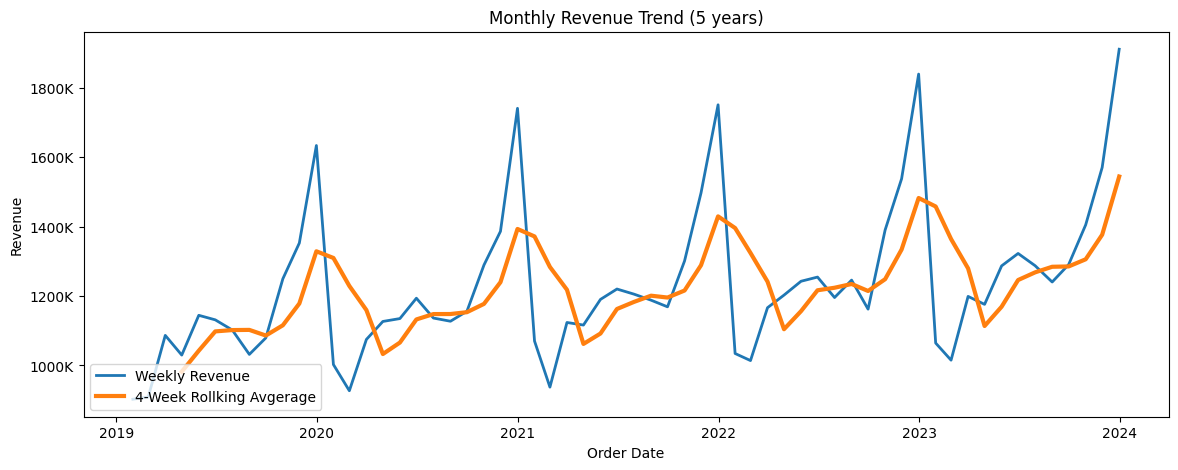

In [38]:
# Monthly Revenue Trend (Seasonality Check) 
# Time-series resampling to aggregate revenue at a monthly level
orders_clean["order_date"] = pd.to_datetime(orders_clean["order_date"])
weekly_revenue = orders_clean.set_index("order_date").resample("M")["revenue"].sum()
weekly_revenue_rolling = weekly_revenue.rolling(4).mean()

plt.figure(figsize=(14,5))

plt.plot(weekly_revenue.index, weekly_revenue.values, label="Weekly Revenue", linewidth=2)
plt.plot(weekly_revenue_rolling.index, weekly_revenue_rolling.values, label="4-Week Rollking Avgerage", linewidth=3)
plt.title("Monthly Revenue Trend (5 years)")
plt.xlabel("Order Date")
plt.ylabel("Revenue")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x/1_000)}K"))

plt.legend(loc="lower left")
plt.show()

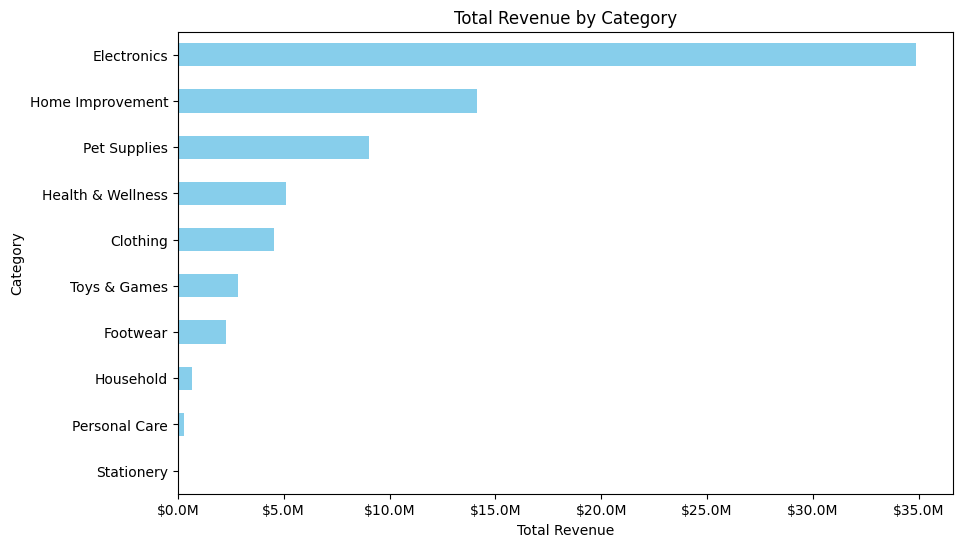

In [39]:
# Category Revenue Share
revenue_category = (
    orders_clean
    .merge(products_clean[["product_id", "category_id"]], on="product_id", how="left")
    .merge(categories_clean[["category_id", "category_name"]], on="category_id", how="left")
)

plt.figure(figsize=(10,6))
revenue_category.groupby("category_name")["revenue"].sum().sort_values().plot(kind="barh", color="skyblue")
plt.title("Total Revenue by Category")
plt.xlabel("Total Revenue")
plt.ylabel("Category")
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"${x/1_000_000:.1f}M"))
plt.show()

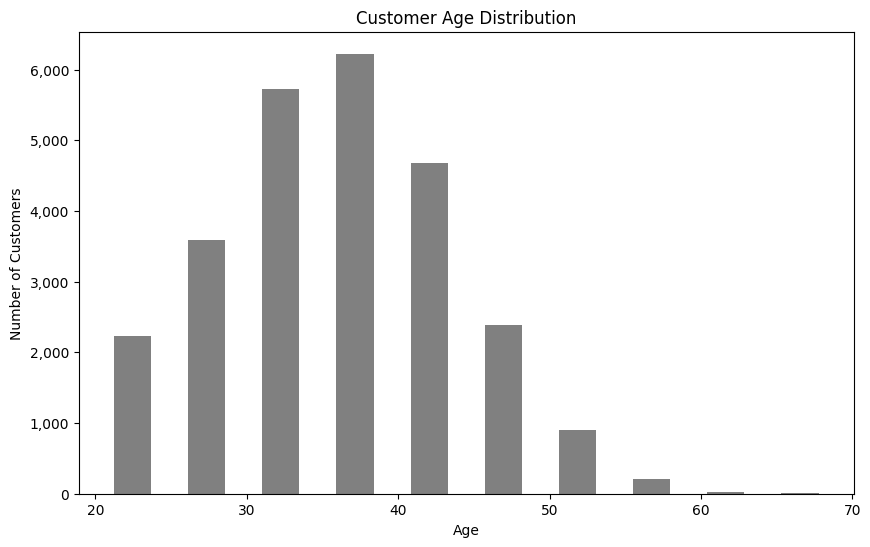

In [40]:
# Customer Demographics - Age Distribution
current_year = pd.Timestamp.now().year
customers_clean["age"] = current_year - customers_clean["birth_year"]
age_series = customers_clean["age"].dropna()
age_series = age_series[age_series.between(1,100)]

plt.figure(figsize=(10,6))
plt.hist(age_series, bins=10, rwidth=0.5, color="gray")
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}"))

plt.show()

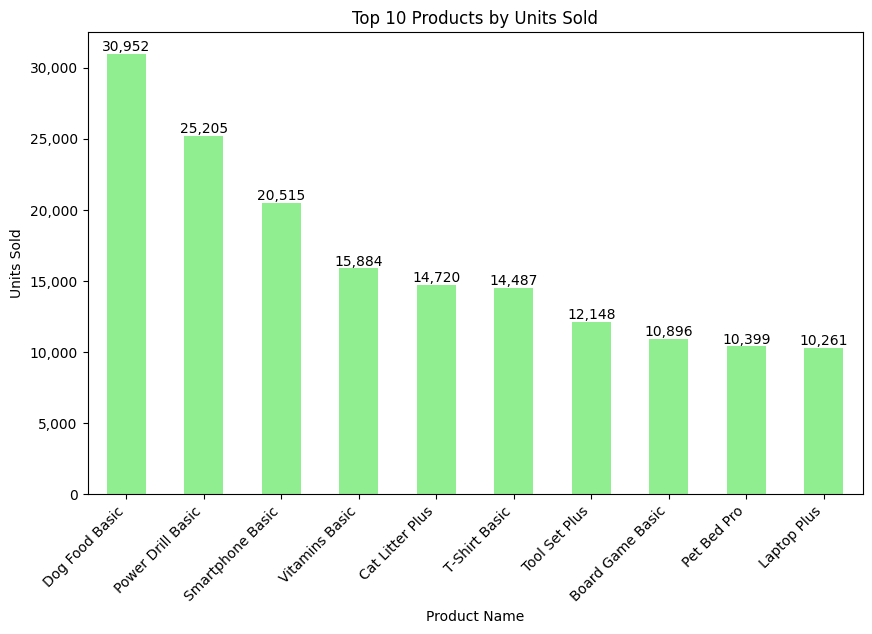

In [41]:
# Top-selling Products
orders_products = orders_clean.merge(products_clean[["product_id", "product_name"]], on="product_id", how="left")
top_products = orders_products.groupby("product_name")["quantity"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_products.plot(kind="bar", color="lightgreen")
plt.title("Top 10 Products by Units Sold")
plt.xlabel("Product Name")
plt.ylabel("Units Sold")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.xticks(rotation=45, ha="right")

for i, v in enumerate(top_products):
    plt.text(i, v, f"{int(v):,}", ha="center", va="bottom")

plt.show()

C:\Users\Qcells\AppData\Local\Temp\ipykernel_4416\1552214886.py:9: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  orders_category.set_index("order_date").groupby([pd.Grouper(freq="Q"), "category_name"])["revenue"]


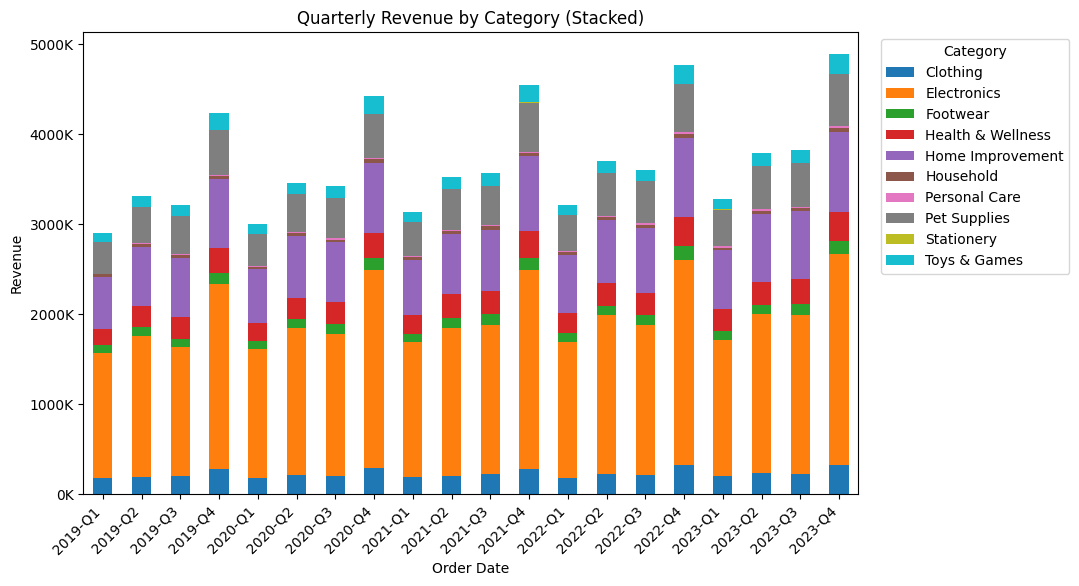

In [42]:
# Stacked Quarterly Revenue by Category
orders_category = (
    orders_clean
    .merge(products_clean[["product_id", "category_id"]], on="product_id", how="left")
    .merge(categories_clean, on="category_id", how="left")
)

quarterly_revenue_category = (
    orders_category.set_index("order_date").groupby([pd.Grouper(freq="Q"), "category_name"])["revenue"]
    .sum().unstack(fill_value=0)
)

q_index = quarterly_revenue_category.index.to_period("Q")
quarterly_revenue_category.index = (
    q_index.year.astype(str) + "-Q" + q_index.quarter.astype(str)
)

quarterly_revenue_category.plot(kind="bar", stacked=True, figsize=(10,6))

plt.title("Quarterly Revenue by Category (Stacked)")
plt.xlabel("Order Date")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha="right")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x/1_000)}K"))
plt.legend(title="Category", bbox_to_anchor=(1.02, 1))
plt.show()

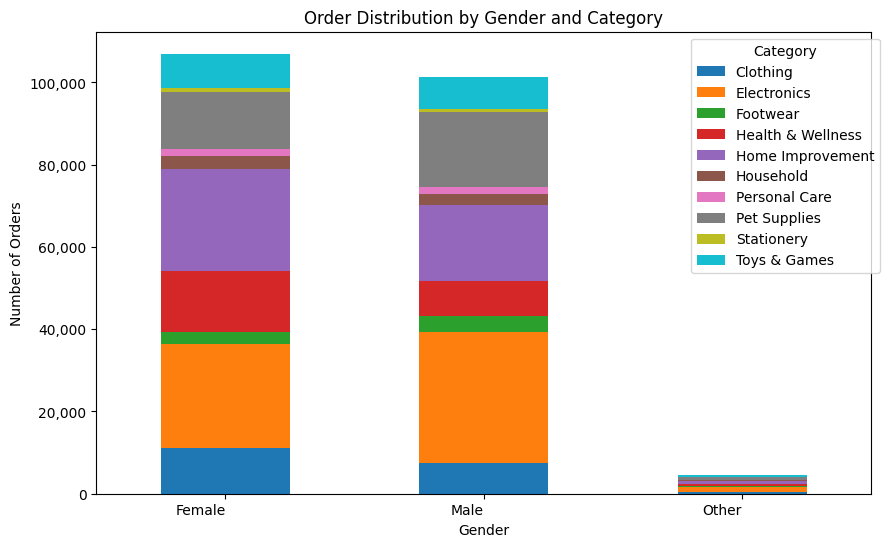

In [44]:
orders_customer_cat = orders_cat.merge(customers_clean[["customer_id", "gender"]], on="customer_id", how="left")
gender_category_orders = orders_customer_cat.groupby(["gender", "category_name"])["order_id"].count().unstack()

gender_category_orders.plot(kind="bar",stacked=True, figsize=(10, 6))

plt.title("Order Distribution by Gender and Category")
plt.xlabel("Gender")
plt.ylabel("Number of Orders")
plt.xticks(rotation=0, ha="right")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.legend(title="Category", bbox_to_anchor=(1.02, 1))
plt.show()

## Extract Cleaned Tables

In [45]:
orders_clean = orders_clean.drop(["revenue", "year", "month", "day"], axis=1)
customers_clean = customers_clean.drop("age", axis=1)

In [46]:
orders_clean.to_csv("orders_clean.csv", index=False)
customers_clean.to_csv("customers_clean.csv", index=False)
products_clean.to_csv("products_clean.csv", index=False)
categories_clean.to_csv("categories_clean.csv", index=False)

## Connect PostgreSQL

In [53]:
!pip -q install psycopg2-binary sqlalchemy

In [48]:
from sqlalchemy import create_engine, text

In [50]:
PG_HOST = "localhost"
PG_PORT = 5433
PG_DB = "your_db"
PG_USER = "your_username"
PG_PW = "your_password"
PG_SCHEMA = "your_schema"

engine = create_engine(
    f"postgresql+psycopg2://{PG_USER}:{PG_PW}@{PG_HOST}:{PG_PORT}/{PG_DB}",
    pool_pre_ping=True
)

In [ ]:
ddl = f"""
CREATE SCHEMA IF NOT EXISTS {PG_SCHEMA};

DROP TABLE IF EXISTS {PG_SCHEMA}.orders;
DROP TABLE IF EXISTS {PG_SCHEMA}.customers;
DROP TABLE IF EXISTS {PG_SCHEMA}.products;
DROP TABLE IF EXISTS {PG_SCHEMA}.categories;

CREATE TABLE {PG_SCHEMA}.categories (
    category_id INT PRIMARY KEY,
    category_name TEXT NOT NULL
);

CREATE TABLE {PG_SCHEMA}.products (
    product_id INT PRIMARY KEY,
    product_name TEXT NOT NULL,
    category_id INT NOT NULL REFERENCES {PG_SCHEMA}.categories(category_id),
    unit_price NUMERIC(12,2) NOT NULL
);

CREATE TABLE {PG_SCHEMA}.customers (
    customer_id INT PRIMARY KEY,
    name TEXT NOT NULL,
    email TEXT,
    birth_year INT,
    birthday_month INT,
    gender TEXT,
    address TEXT,
    state TEXT,
    member_since DATE,
    membership_tier TEXT
);

CREATE TABLE {PG_SCHEMA}.orders (
    order_id BIGINT PRIMARY KEY,
    product_id INT NOT NULL REFERENCES {PG_SCHEMA}.products(product_id),
    customer_id INT NOT NULL REFERENCES {PG_SCHEMA}.customers(customer_id),
    quantity INT NOT NULL,
    price NUMERIC(12,2),
    order_date DATE,
    order_time TIME,
    delivery_to TEXT, 
    delivery_status TEXT, 
    discount_percent INT,
    shipping_method TEXT, 
    coupon_code TEXT,
    is_gift BOOLEAN
);
"""

with engine.begin() as conn:
    conn.execute(text(ddl))

print("Clean schema/tables created.")

In [56]:
with engine.begin() as conn:
    conn.execute(text("""
        TRUNCATE TABLE
            retail.orders,
            retail.customers,
            retail.products,
            retail.categories
        RESTART IDENTITY CASCADE;
    """))

print("Tables truncated successfully.")

Tables truncated successfully.


In [57]:
categories_clean.to_sql("categories", engine, schema=PG_SCHEMA, 
                        if_exists="append", index=False, method="multi", chunksize=5000)

products_clean.to_sql("products", engine, schema=PG_SCHEMA, 
                      if_exists="append", index=False, method="multi", chunksize=5000)

customers_clean.to_sql("customers", engine, schema=PG_SCHEMA,
                       if_exists="append", index=False, method="multi", chunksize=5000)

orders_clean.to_sql("orders", engine, schema=PG_SCHEMA,
                    if_exists="append", index=False, method="multi", chunksize=10000)

print("Loaded clean tables into PostgreSQL.")

Loaded clean tables into PostgreSQL.
